### Synthetic Scenario (figure 3)

/home/administrator/.local/lib/python3.10/site-packages/matplotlib/patches.py:1145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)


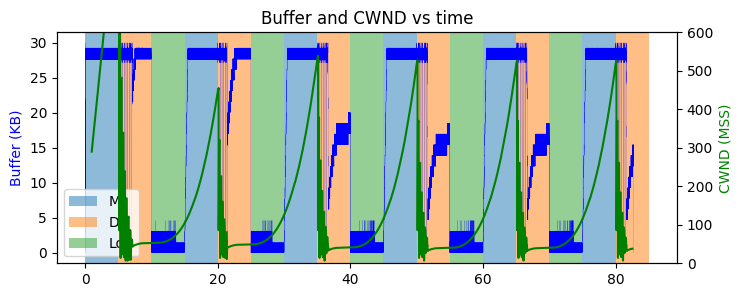

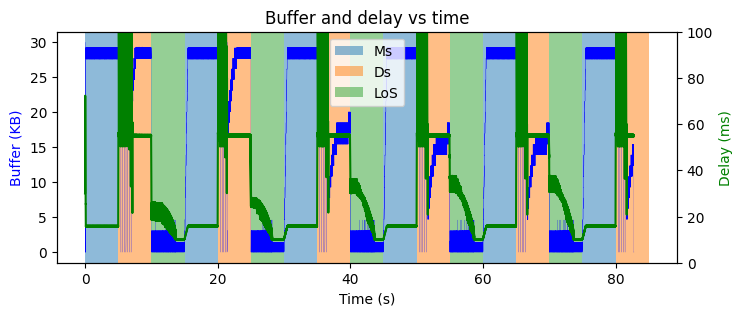

In [1]:
import numpy as np
import matplotlib.pyplot as plt
Outcome_folder = "RESULTS"

def plot_state_as_color(x_data, state_data, axis, add_labels=True):
    state_current = state_data[0]
    span_left = x_data[0]
    state_encountered = []
    for span_right, state_next in zip(x_data, state_data):
        if state_current != state_next:
            label = None
            if state_current not in state_encountered:
                state_encountered.append(state_current)
                if add_labels:
                    label = state_current

            # plot section
            color = "C{}".format(state_encountered.index(state_current))
            axis.axvspan(span_left, span_right, facecolor=color, alpha=0.5, label=label)

            # Update current state parameters
            span_left = span_right
            state_current = state_next

scenario = 'Cubic_SyntheticLMS'
foldername= f"./{Outcome_folder}/{scenario}/logCwnd.log"

with open (foldername) as datatoread:
     cwnd = np.loadtxt(datatoread)

foldername= f"./{Outcome_folder}/{scenario}/logBuffer.log"
with open (foldername) as datatoread:
     buff = np.loadtxt(datatoread)

foldername= f"./{Outcome_folder}/{scenario}/ChannelVar.log"
with open (foldername) as datatoread:
     ChannelVar = np.loadtxt(datatoread)


fig, ax1 = plt.subplots(figsize=(8,3))
ax2 = ax1.twinx()
ax1.plot(buff[:,0], buff[:,1]/1000, 'b', linewidth=0.1)
ax2.plot(cwnd[:,0], cwnd[:,1], 'g-')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('CWND (MSS)', color='g')
ax2.set_ylim(0, 600)
ax1.set_ylabel('Buffer (KB)', color='b')
index= np.argwhere(ChannelVar[:,0]<90)
state_display_name = { 1: "LoS", 2: "Ms", 3: "Ds"}
state = [state_display_name[s] for s in ChannelVar[:,1]]
plot_state_as_color(x_data=ChannelVar[index,0], state_data=state, axis=ax1)
ax1.legend()
ax1.set_title('Buffer and CWND vs time')
plt.savefig('../figures/figure3_a.png')
plt.show()
plt.close()

foldername = f"./{Outcome_folder}/{scenario}/TxFile.log".format(Outcome_folder)
with open (foldername) as datatoread:
     Tx = np.loadtxt(datatoread)

foldername = f"./{Outcome_folder}/{scenario}/RxFile.log".format(Outcome_folder)
with open (foldername) as datatoread:
     Rx = np.loadtxt(datatoread)

fig, ax1 = plt.subplots(figsize=(8,3))
ax2 = ax1.twinx()
delay = Rx[:,1] - Tx[:,1]
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Buffer (KB)', color='b')
ax2.set_ylabel('Delay (ms)', color='g')
ax2.plot(Tx[:,1], delay*1000, color='g')
ax2.set_ylim(0, 100)
ax1.plot(buff[:,0], buff[:,1]/1000, 'b', linewidth=0.1)
index = np.argwhere(ChannelVar[:,0]<90)
state = [state_display_name[s] for s in ChannelVar[:,1]]
plot_state_as_color(x_data=ChannelVar[index,0], state_data=state, axis=ax1)
ax1.legend(loc='upper center')
ax1.set_title('Buffer and delay vs time')
plt.savefig('../figures/figure3_b.png')
plt.show()
plt.close()

### Realistic LMS link (figure 4)

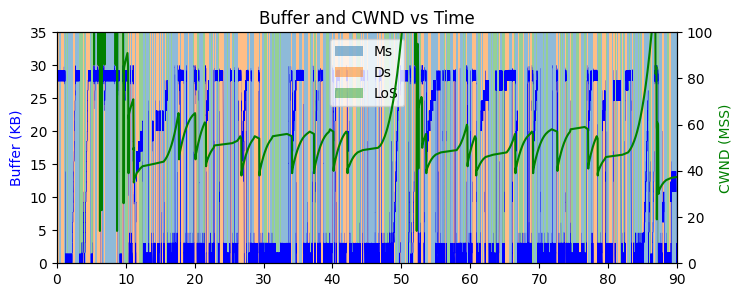

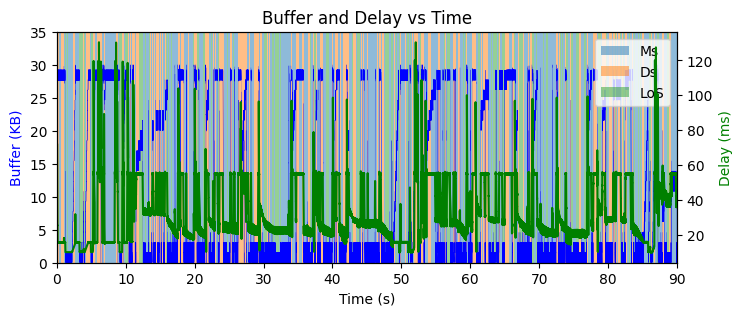

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Outcome_folder = "RESULTS"

def plot_state_as_color(x_data, state_data, axis, add_labels=True):
    state_current = state_data[0]
    span_left = x_data[0]
    state_encountered = []
    for span_right, state_next in zip(x_data, state_data):
        if state_current != state_next:
            label = None
            if state_current not in state_encountered:
                state_encountered.append(state_current)
                if add_labels:
                    label = state_current

            # plot section
            color = "C{}".format(state_encountered.index(state_current))
            axis.axvspan(span_left, span_right, facecolor=color, alpha=0.5, label=label)

            # Update current state parameters
            span_left = span_right
            state_current = state_next

scenario = 'Cubic_RealisticLMS'
foldername= f"./{Outcome_folder}/{scenario}/logCwnd.log"

with open (foldername) as datatoread:
     cwnd = np.loadtxt(datatoread)

foldername= f"./{Outcome_folder}/{scenario}/logBuffer.log".format(Outcome_folder)
with open (foldername) as datatoread:
     buff = np.loadtxt(datatoread)

foldername= f"./{Outcome_folder}/{scenario}/ChannelVar.log".format(Outcome_folder)
with open (foldername) as datatoread:
     ChannelVar = np.loadtxt(datatoread)


fig, ax1 = plt.subplots(figsize=(8,3))
ax2 = ax1.twinx()
ax1.plot(buff[:,0], buff[:,1]/1000, 'b', linewidth=0.1)
ax2.plot(cwnd[:,0], cwnd[:,1], 'g-')
ax2.set_ylim(0, 100)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('CWND (MSS)', color='g')
ax1.set_ylabel('Buffer (KB)', color='b')
ax1.set_xlim(0, 90)
ax1.set_ylim(0,35)
state_display_name = { 1: "LoS",
                      2: "Ms",
                      3: "Ds"}
index= np.argwhere(ChannelVar[:,0]<100)
state = [state_display_name[s] for s in ChannelVar[:,1]]
plot_state_as_color(x_data=ChannelVar[index,0], state_data=state, axis=ax1)
ax1.legend(loc="upper center")
ax1.set_title('Buffer and CWND vs Time')
plt.savefig('../figures/figure4_a.png')
plt.show()
plt.close()

foldername = f"./{Outcome_folder}/{scenario}/TxFile.log".format(Outcome_folder)
with open (foldername) as datatoread:
     Tx = np.loadtxt(datatoread)

foldername = f"./{Outcome_folder}/{scenario}/RxFile.log".format(Outcome_folder)
with open (foldername) as datatoread:
     Rx = np.loadtxt(datatoread)

fig, ax1 = plt.subplots(figsize=(8,3))
ax2 = ax1.twinx()
delay = Rx[:,1] - Tx[:,1]
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Buffer (KB)', color='b')
ax2.set_ylabel('Delay (ms)', color='g')
ax2.plot(Tx[:,1], delay*1000, color='g')
ax1.set_xlim(0, 90)
ax1.set_ylim(0, 35)
ax1.plot(buff[:,0], buff[:,1]/1000, 'b', linewidth=0.1)
state = [state_display_name[s] for s in ChannelVar[:,1]]
index= np.argwhere(ChannelVar[:,0]<100)
plot_state_as_color(x_data=ChannelVar[index,0], state_data=state, axis=ax1)
ax1.legend(loc='upper right')
ax1.set_title('Buffer and Delay vs Time')
plt.savefig('../figures/figure4_b.png')
plt.show()
plt.close()

### End-to-end with disconnections traffic: LMS - ISL(disconnections)-LMS (figure 5)


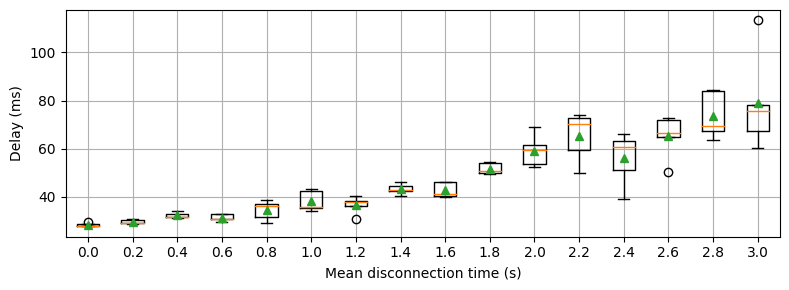

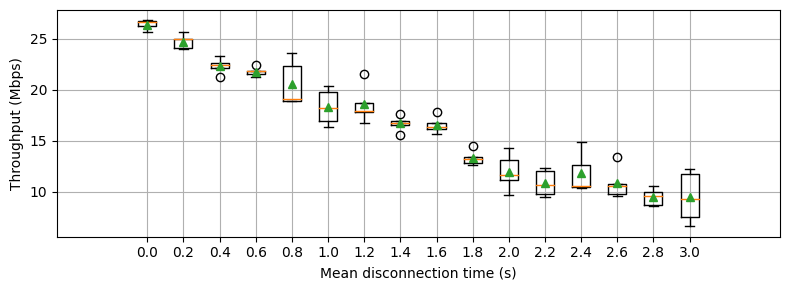

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True

Time_min_value = 0
Time_max_value = 3
Step = 0.2
Nsim = 5
Configs = np.round(np.arange(Time_min_value,Time_max_value+Step,Step),2)
delay = []
thput = []

result = "RESULTS/endToEndDisconnect"
for conf in Configs:
     delAux = []
     thPutAux = []
     for sim in range(1,Nsim+1,1):
          foldername = "./{}/Cubicstop{}_sims/{}/TxFile.log".format(result,conf,sim)
          with open (foldername) as datatoread:
               Tx = np.loadtxt(datatoread)
          foldername = "./{}/Cubicstop{}_sims/{}/RxFile.log".format(result,conf,sim)
          with open (foldername) as datatoread:
               Rx = np.loadtxt(datatoread)
          delAux.append(sum((Rx[:,1] - Tx[0:len(Rx[:,1]),1])/len(Rx[:,1])*1000))
          thPutAux.append((np.sum(Rx[:,2])*8)/(Rx[len(Rx)-1,1]- Rx[0,1])*1e-6)

     delay.append(delAux)          
     thput.append(thPutAux)
delay = np.array(delay)     
thput = np.array(thput)     

fig = plt.figure(figsize=(8,3))
plt.boxplot(delay.transpose(), positions=Configs, showmeans=True, widths=0.1)
plt.ylabel('Delay (ms)')
plt.xlabel('Mean disconnection time (s)')
plt.xlim(-0.1, 3.1)
plt.grid()
plt.savefig('../figures/figure5_a.png')
plt.show()
plt.close()

fig = plt.figure(figsize=(8,3))
plt.boxplot(thput.transpose(), positions=Configs, showmeans=True, widths=0.1)
plt.ylabel('Throughput (Mbps)')
plt.xlabel('Mean disconnection time (s)')
plt.xlim(-0.1, 3.1)
plt.grid()
plt.savefig('../figures/figure5_b.png')
plt.show()
plt.close()

### End-to-end with background traffic: LMS - ISL(background traffic)-LMS (figure 6)

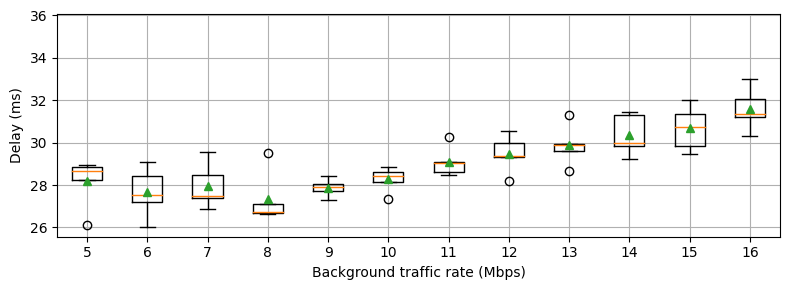

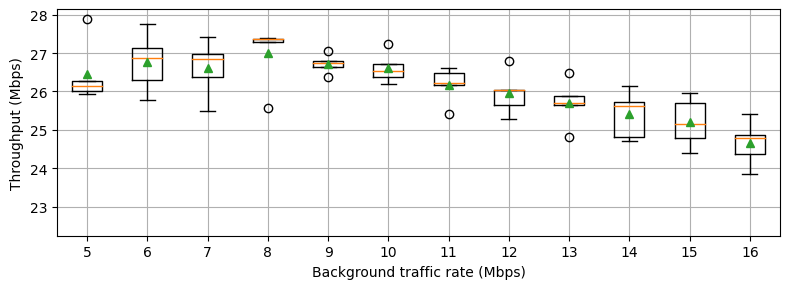

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True

Min_rate = 5
Max_rate = 20
Step = 1
Nsim = 5
Configs = range(Min_rate,Max_rate+Step,Step)
delay = []
thput = []

result = "RESULTS/endToEndBackground"
for conf in Configs:
     delAux = []
     thPutAux = []
     for sim in range(1,Nsim+1,1):
          foldername = "./{}/Cubic_background_{}_mbps/{}/TxFile.log".format(result,conf,sim)
          with open (foldername) as datatoread:
               Tx = np.loadtxt(datatoread)
          foldername = "./{}/Cubic_background_{}_mbps/{}/RxFile.log".format(result,conf,sim)
          with open (foldername) as datatoread:
               Rx = np.loadtxt(datatoread)
          delAux.append(sum((Rx[:,1] - Tx[0:len(Rx[:,1]),1])/len(Rx[:,1])*1000))
          thPutAux.append((np.sum(Rx[:,2])*8)/(Rx[len(Rx)-1,1]- Rx[0,1])*1e-6)

     delay.append(delAux)          
     thput.append(thPutAux)
delay = np.array(delay)     
thput = np.array(thput)     

fig = plt.figure(figsize=(8,3))
plt.boxplot(delay.transpose(), positions=Configs, showmeans=True)
plt.ylabel('Delay (ms)')
plt.xlabel('Background traffic rate (Mbps)')
plt.xlim(4.5, 16.5)
plt.grid()
plt.savefig('../figures/figure6_a.png')
plt.show()
plt.close()

fig = plt.figure(figsize=(8,3))
plt.boxplot(thput.transpose(), positions=Configs, showmeans=True)
plt.ylabel('Throughput (Mbps)')
plt.xlabel('Background traffic rate (Mbps)')
plt.xlim(4.5, 16.5)
plt.grid()
plt.savefig('../figures/figure6_b.png')
plt.show()
plt.close()